In [20]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import json,os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [21]:
users_path = 'https://drive.google.com/drive/folders/1hK33pXYkdiH_AYaJ495Jyx8eyfGTAJ6J?usp=share_link/yelp_academic_dataset_review.json'

In [22]:
users_ll = pd.read_json(users_path, lines=True)




ValueError: Expected object or value

In [6]:
users = pd.DataFrame(users_ll)
users.shape

(1123492, 23)

In [7]:
users.columns

Index(['_id', 'user_id', 'name', 'review_count', 'yelping_since', 'useful',
       'funny', 'cool', 'elite', 'friends', 'fans', 'average_stars',
       'compliment_hot', 'compliment_more', 'compliment_profile',
       'compliment_cute', 'compliment_list', 'compliment_note',
       'compliment_plain', 'compliment_cool', 'compliment_funny',
       'compliment_writer', 'compliment_photos'],
      dtype='object')

In [8]:
ca_review_path = './Clean_data_files/California_reviews_c.csv'
reviews = pd.read_csv(ca_review_path)
user_ids = reviews.user_id
users_ca = users[users['user_id'].isin(user_ids)]
users_ca.shape

(15384, 23)

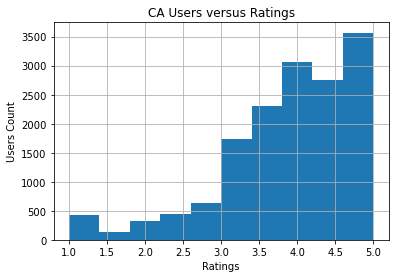

In [9]:
users_ca.average_stars.hist()
plt.xlabel("Ratings")
plt.ylabel("Users Count")
plt.title('CA Users versus Ratings')
plt.savefig("./Images/EDA_CA_Users_versus_Ratings.png")

In [10]:

print("Number of users with zero reviews:")
len(users_ca.loc[users_ca['review_count'] == 0])

Number of users with zero reviews:


1

In [11]:
users_ca = users_ca[users_ca.review_count != 0]
users_ca.shape

(15383, 23)

## Studying users based on review count

In [12]:
## counting users with less than and more than 100 reviews
less_than_100 = len(users_ca.loc[users_ca['review_count'] < 100])
more_than_1000 = len(users_ca.loc[users_ca['review_count'] >= 1000])
more_than_100 = len(users_ca.loc[users_ca['review_count'] >= 100])

print('Users with reviews count less than 100 = ', less_than_100)
print('Users with reviews count more than 100 but less than 1000 = ', more_than_100 - more_than_1000)
print('Users with reviews count more than 1000 = ', more_than_1000)


Users with reviews count less than 100 =  14175
Users with reviews count more than 100 but less than 1000 =  1197
Users with reviews count more than 1000 =  11


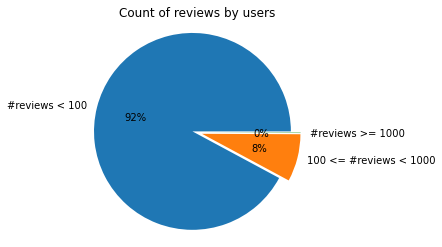

In [13]:
my_data = [less_than_100, more_than_100 - more_than_1000, more_than_1000]
my_labels = '#reviews < 100','100 <= #reviews < 1000','#reviews >= 1000'
explode = (0.05, 0.05, 0.05)
plt.pie(my_data,labels=my_labels, autopct='%1.0f%%', explode = explode)
plt.title('Count of reviews by users')
plt.axis('equal')
plt.savefig("./Images/EDA_Count_of _reviews_by_users.png")

## Studying the correlation of attributes with average_stars

In [14]:

users_ca.corr()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
review_count,1.000000,0.534828,0.467713,0.444122,0.630473,0.002583,0.422515,0.482232,0.444661,0.348949,0.445919,0.457979,0.450789,0.483757,0.483757,0.468015,0.281136
useful,0.534828,1.000000,0.982954,0.990442,0.705445,-0.004595,0.712235,0.568780,0.577814,0.345481,0.440619,0.580752,0.617187,0.758685,0.758685,0.688173,0.679719
funny,0.467713,0.982954,1.000000,0.985460,0.694591,-0.004243,0.752213,0.593280,0.614612,0.371668,0.455966,0.586295,0.631430,0.794004,0.794004,0.734299,0.710266
cool,0.444122,0.990442,0.985460,1.000000,0.643691,0.002334,0.695004,0.531601,0.547584,0.315631,0.399660,0.539280,0.579134,0.732843,0.732843,0.657599,0.673991
fans,0.630473,0.705445,0.694591,0.643691,1.000000,0.006452,0.723195,0.655226,0.578995,0.517676,0.540593,0.716040,0.694167,0.750777,0.750777,0.694519,0.600607
average_stars,0.002583,-0.004595,-0.004243,0.002334,0.006452,1.000000,-0.003108,-0.005744,-0.004558,-0.003928,-0.006816,-0.006158,-0.002802,-0.002170,-0.002170,-0.003150,-0.000005
compliment_hot,0.422515,0.712235,0.752213,0.695004,0.723195,-0.003108,1.000000,0.837107,0.841983,0.755023,0.728541,0.828014,0.794842,0.915321,0.915321,0.874048,0.721375
compliment_more,0.482232,0.568780,0.593280,0.531601,0.655226,-0.005744,0.837107,1.000000,0.874449,0.643887,0.703160,0.829857,0.813582,0.848257,0.848257,0.804330,0.521337
compliment_profile,0.444661,0.577814,0.614612,0.547584,0.578995,-0.004558,0.841983,0.874449,1.000000,0.586511,0.738786,0.697552,0.763264,0.881688,0.881688,0.876014,0.630664
compliment_cute,0.348949,0.345481,0.371668,0.315631,0.517676,-0.003928,0.755023,0.643887,0.586511,1.000000,0.718003,0.641147,0.511328,0.598567,0.598567,0.528968,0.320249


In [15]:
users_ca = users_ca.drop(['cool', 'compliment_hot','compliment_plain', 'compliment_cool','compliment_funny'], axis=1)

In [16]:
users_ca.head(5)

,_id,user_id,name,review_count,yelping_since,useful,funny,elite,friends,fans,average_stars,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_writer,compliment_photos
49,{'$oid': '638f05686bdfffd9a88fa0f6'},UX5F5uklksvo-MTPFMD_kQ,Customers'Experience,107,2012-11-26 18:08:10,178,69,,f_1bRw8RuK-zZAKuUMTqNw,2,3.23,0,0,0,0,5,0,0
76,{'$oid': '638f05686bdfffd9a88fa111'},DKg1g4YdyJE5VnSKE3A8xQ,Cory,33,2010-06-08 04:42:09,55,24,,"KxCFu6YQueG4VH8PmjFepw, bI3NlUbe5PmZswk0ptNY7Q...",1,3.65,0,0,0,0,0,1,0
381,{'$oid': '638f05686bdfffd9a88fa242'},rAwpi3P0xp-3S6Fzgjpvnw,Devin,39,2010-12-11 20:42:42,27,6,,"0M5tz4eu5Q1EYhkY0MZLdw, nWuMs1QzNzg80DyZ5LfzjA...",1,4.16,0,0,0,0,0,0,0
398,{'$oid': '638f05686bdfffd9a88fa253'},UdKQcwk0kLf4AXtKGDvw4w,gerri,21,2011-03-23 20:52:09,21,3,,"13aKcTSreP_OAYOUGm4fdQ, EiDAznc0WmfomvWJ_pPOJw...",1,4.52,0,0,0,0,0,0,0
483,{'$oid': '638f05686bdfffd9a88fa2a8'},rue63aaJc5qpmruNlML-Lg,Noelle,19,2015-01-15 06:39:04,11,5,,"aGsLl2tTKtaqtxsCu83fdA, bkwGRRYNkSDaJ0NmlGzCcQ...",2,4.47,0,0,0,0,0,0,0


<AxesSubplot:>

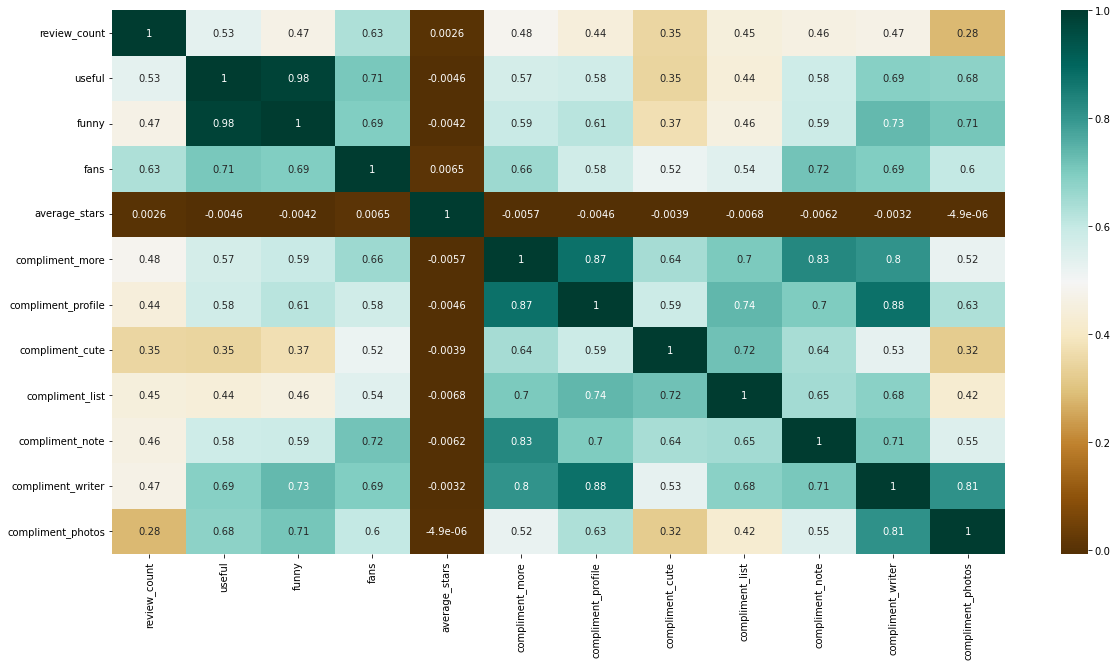

In [17]:
plt.figure(figsize=(20,10))
cor_matrix = users_ca.corr()
sns.heatmap(cor_matrix, cmap= "BrBG", annot=True)